#Tugas Data Mining Naïve Bayes dan KNN
Falih Aly Mufid (4101422018)



In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


* Fungsi :
`pandas`:  untuk membaca dan memanipulasi dataset

`train_test_split`: membagi dataset menjadi data latih dan uji

`LabelEncoder`: mengubah nilai kategorik menjadi numerik

`StandardScaler`: menormalisasi nilai fitur agar berada dalam skala yang seragam

`confusion_matrix`, `accuracy_score`, dll: untuk evaluasi performa model

`matplotlib.pyplot`: untuk visualisasi hasil evaluasi

`KNeighborsClassifier`, `GaussianNB`, `MLPClassifier`: algoritma klasifikasi yang digunakan

In [30]:
data=pd.read_csv('/content/drive/MyDrive/kidney_disease_dataset.csv')

# Data yang digunakan

In [31]:
data.head()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


In [32]:
data.tail()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
20533,86,113,1.008,5,3,normal,abnormal,not present,not present,473,...,no,38.2,low,25,1,2.77,normal,2.45,9.31,No_Disease
20534,47,80,1.016,3,4,normal,abnormal,not present,not present,477,...,no,26.8,moderate,3,7,1.81,normal,4.19,3.45,No_Disease
20535,89,178,1.011,3,5,abnormal,abnormal,not present,not present,141,...,yes,30.0,low,6,25,1.32,abnormal,5.32,8.39,No_Disease
20536,86,138,1.009,1,5,abnormal,normal,not present,present,110,...,yes,28.9,low,0,21,2.52,abnormal,0.61,9.53,No_Disease
20537,63,120,1.015,4,5,abnormal,abnormal,present,not present,256,...,no,36.7,moderate,3,28,1.03,normal,7.00,2.36,No_Disease


In [34]:
data.describe()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Random blood glucose level (mg/dl),Blood urea (mg/dl),Serum creatinine (mg/dl),Sodium level (mEq/L),Potassium level (mEq/L),...,Cholesterol level,Parathyroid hormone (PTH) level,Serum calcium level,Serum phosphate level,Body Mass Index (BMI),Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level
count,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,...,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000
mean,47.477895,130.352079,1.015041,2.501266,2.494595,284.630295,104.094240,7.781865,135.076646,4.992314,...,200.236440,40.265400,9.001840,4.241157,27.544240,14.918152,14.946879,1.749459,5.061633,7.702504
std,24.941947,29.063838,0.005793,1.697084,1.701059,124.633265,55.726482,4.179925,8.651000,0.871026,...,57.863374,17.310488,0.867301,1.006735,7.221082,8.963722,8.945500,0.718980,2.853217,4.191765
min,5.000000,80.000000,1.005000,0.000000,0.000000,70.000000,7.002370,0.500000,120.000613,3.500005,...,100.000000,10.000045,7.500000,2.500000,15.000000,0.000000,0.000000,0.500000,0.100000,0.500000
25%,26.000000,105.000000,1.010000,1.000000,1.000000,176.000000,55.864665,4.200000,127.563468,4.229885,...,150.000000,25.396841,8.250000,3.380000,21.300000,7.000000,7.000000,1.130000,2.600000,4.050000
50%,47.000000,131.000000,1.015000,3.000000,2.000000,284.500000,104.401355,7.780000,135.044974,4.990991,...,200.000000,40.423386,8.990000,4.230000,27.600000,15.000000,15.000000,1.750000,5.070000,7.710000
75%,69.000000,156.000000,1.020000,4.000000,4.000000,393.000000,152.480048,11.430000,142.607311,5.749899,...,250.000000,55.272665,9.750000,5.110000,33.800000,23.000000,23.000000,2.370000,7.537500,11.297500
max,90.000000,180.000000,1.025000,5.000000,5.000000,500.000000,199.994361,15.000000,149.999914,6.499827,...,300.000000,69.999871,10.500000,6.000000,40.000000,30.000000,30.000000,3.000000,10.000000,15.000000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20538 non-null  int64  
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20538 non-null  int64  
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20538 non-null  object 
 6   Pus cells in urine                           20538 non-null  object 
 7   Pus cell clumps in urine                     20538 non-null  object 
 8   Bacteria in urine                            20538 non-null  object 
 9   Random blood glucose level (mg/dl)           20538 non-null  int64  
 10

#Mengecek Outliers


Outlier dapat dideteksi menggunakan beberapa metode:
- Boxplot → Visualisasi distribusi dan outlier
- Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil

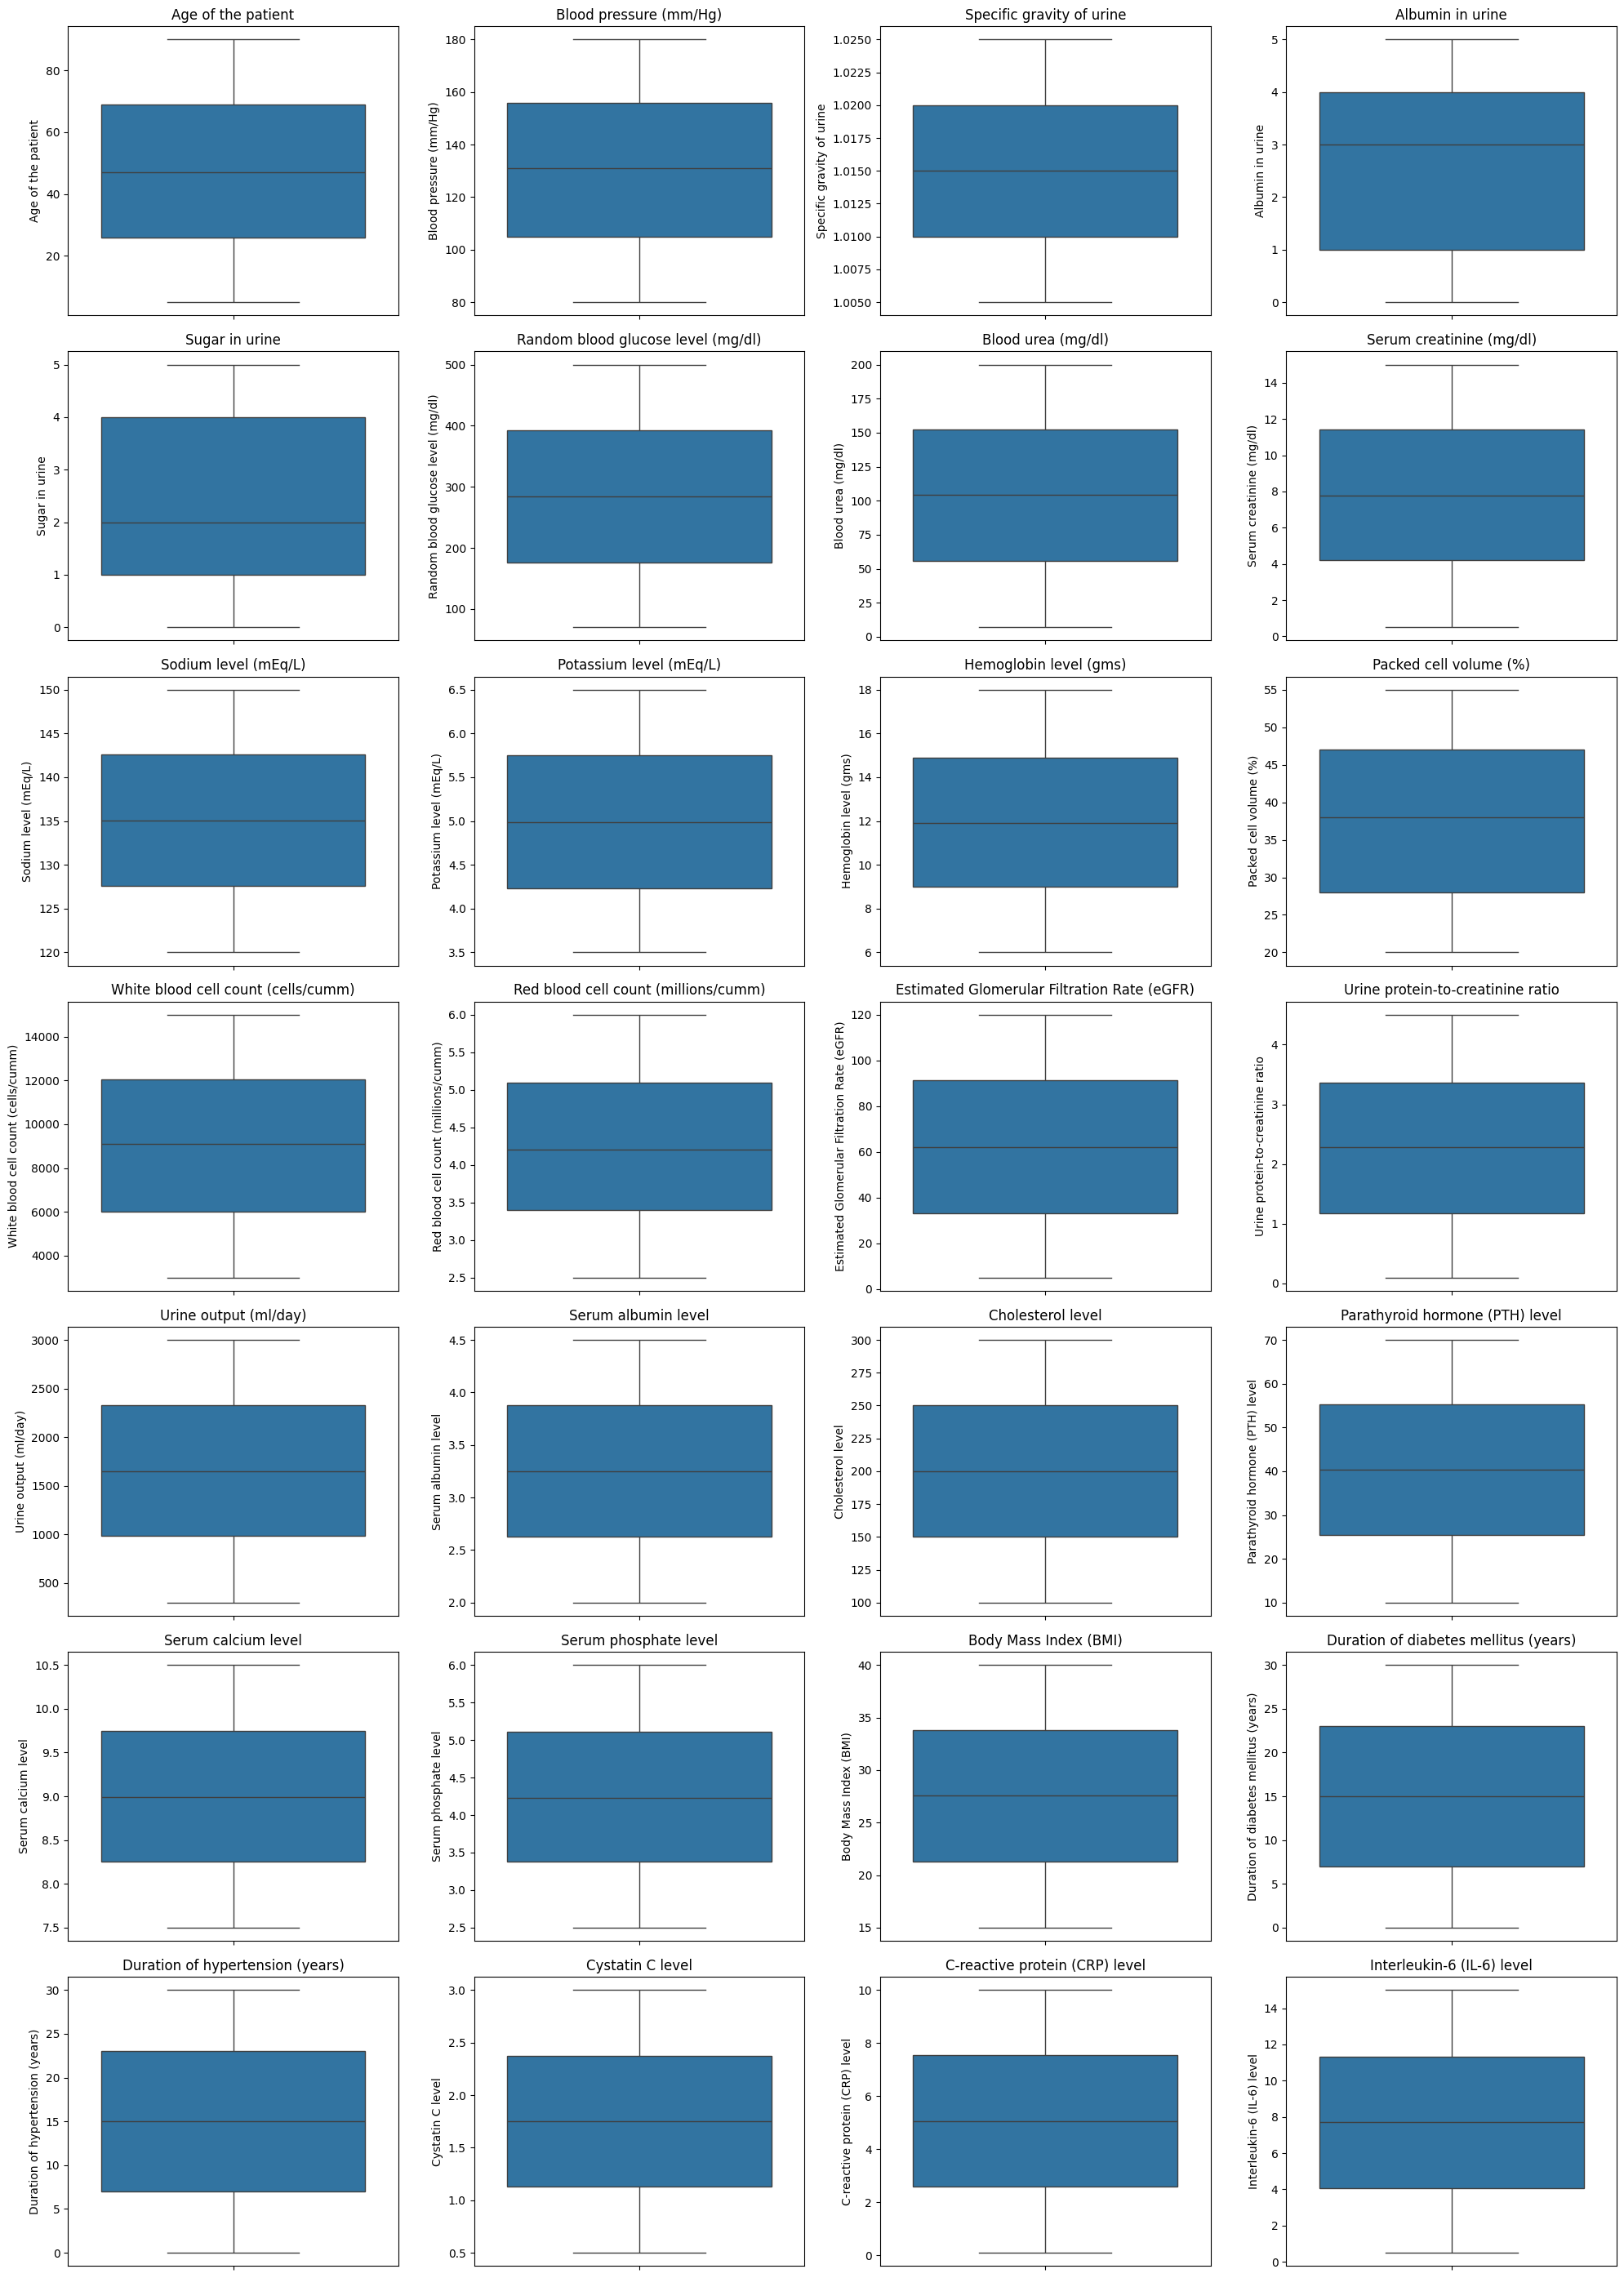

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Cek kolom numerik dari dataset
numeric_cols = data.select_dtypes(include='number').columns.tolist()

# Buat jumlah baris dan kolom subplot
cols = 4
rows = math.ceil(len(numeric_cols) / cols)

# Visualisasi Boxplot
plt.figure(figsize=(5*cols, 4*rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [37]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Ambil kolom numerik dari dataset
numeric_cols = data.select_dtypes(include='number').columns.tolist()

# Cek jumlah outlier untuk setiap kolom numerik
for col in numeric_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")


Age of the patient: 0 outliers
Blood pressure (mm/Hg): 0 outliers
Specific gravity of urine: 0 outliers
Albumin in urine: 0 outliers
Sugar in urine: 0 outliers
Random blood glucose level (mg/dl): 0 outliers
Blood urea (mg/dl): 0 outliers
Serum creatinine (mg/dl): 0 outliers
Sodium level (mEq/L): 0 outliers
Potassium level (mEq/L): 0 outliers
Hemoglobin level (gms): 0 outliers
Packed cell volume (%): 0 outliers
White blood cell count (cells/cumm): 0 outliers
Red blood cell count (millions/cumm): 0 outliers
Estimated Glomerular Filtration Rate (eGFR): 0 outliers
Urine protein-to-creatinine ratio: 0 outliers
Urine output (ml/day): 0 outliers
Serum albumin level: 0 outliers
Cholesterol level: 0 outliers
Parathyroid hormone (PTH) level: 0 outliers
Serum calcium level: 0 outliers
Serum phosphate level: 0 outliers
Body Mass Index (BMI): 0 outliers
Duration of diabetes mellitus (years): 0 outliers
Duration of hypertension (years): 0 outliers
Cystatin C level: 0 outliers
C-reactive protein (CRP

Berdasarkan hasil diatas, tidak terdapat kolom yang memiliki outliers. Sehingga tidak perlu penanganan lanjutan.

# Mengecek Missing value

In [38]:
data.isnull()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20533,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20534,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20535,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20536,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
data.isnull().sum()

,0
Age of the patient,0
Blood pressure (mm/Hg),0
Specific gravity of urine,0
Albumin in urine,0
Sugar in urine,0
Red blood cells in urine,0
Pus cells in urine,0
Pus cell clumps in urine,0
Bacteria in urine,0
Random blood glucose level (mg/dl),0


In [40]:
data.isnull().sum().sum()

np.int64(0)

Berdasarkan hasil diatas, tidak terdapat Missing Value. Sehingga tidak perlu penanganan lanjutan.

#Encoding Kolom Kategorikal

In [47]:
label_cols = data.select_dtypes(include='object').columns
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le



*   Fungsi


Mengubah semua kolom bertipe object ( seperti 'yes', 'no') menjadi angka dengan `LabelEncoder`.


#Split dan Normalisasi Data

In [42]:
X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



*   `X` berisi fitur (semua kolom kecuali `Target`), `y` adalah label atau target klasifikasi (apakah pasien menderita penyakit ginjal atau tidak).

*   `train_test_split`: membagi data jadi 80% pelatihan dan 20% pengujian

*   `StandardScaler`: menstandarisasi data ke mean 0 dan standar deviasi 1 → penting untuk KNN & MLP







#KNN Classifier

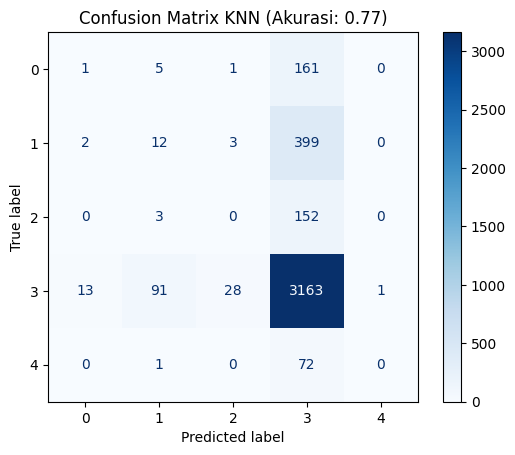

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot(cmap='Blues')
plt.title(f"Confusion Matrix KNN (Akurasi: {acc_knn:.2f})")
plt.show()




*   Fungsi:
1.   Menghitung confusion matrix dan akurasi
2.   Visualisasi confusion matrix dengan warna biru
*   `KNeighborsClassifier` bekerja dengan mencari tetangga terdekat di ruang fitur untuk mengklasifikasikan sampel baru.




#Naive Bayes Classifier

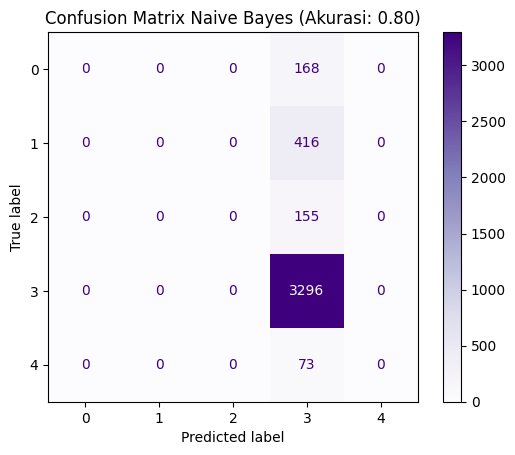

In [44]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
acc_nb = accuracy_score(y_test, y_pred_nb)

disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb.classes_)
disp_nb.plot(cmap='Purples')
plt.title(f"Confusion Matrix Naive Bayes (Akurasi: {acc_nb:.2f})")
plt.show()



*   Fungsi:
1.   Menghitung confusion matrix dan akurasi
2.   Visualisasi confusion matrix
*   `GaussianNB`: Asumsikan distribusi data normal (Gaussian) untuk menghitung probabilitas tiap kelas → sederhana dan efisien

#MLPClassifier (Neural Network)

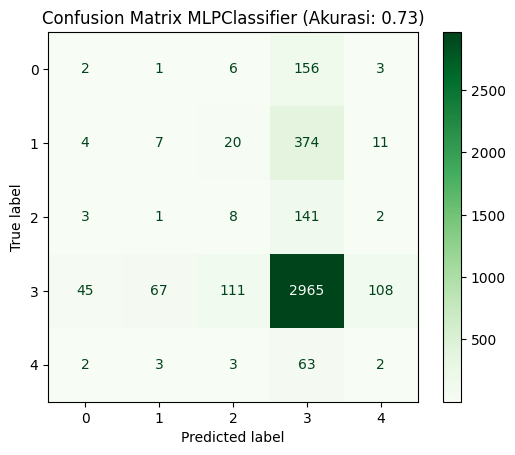

              precision    recall  f1-score   support

           0       0.04      0.01      0.02       168
           1       0.09      0.02      0.03       416
           2       0.05      0.05      0.05       155
           3       0.80      0.90      0.85      3296
           4       0.02      0.03      0.02        73

    accuracy                           0.73      4108
   macro avg       0.20      0.20      0.19      4108
weighted avg       0.66      0.73      0.69      4108



In [45]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

acc_mlp = accuracy_score(y_test, y_pred_mlp)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=mlp.classes_)
disp_mlp.plot(cmap='Greens')
plt.title(f"Confusion Matrix MLPClassifier (Akurasi: {acc_mlp:.2f})")
plt.show()

print(classification_report(y_test, y_pred_mlp))



*   Fungsi :
Menampilkan akurasi, confusion matrix dan precision/recall/F1-score tiap kelas dari model MLP.


*    MLP (Multi-Layer Perceptron):

1.   Jaringan saraf tiruan dengan 1 hidden layer berisi 100 neuron

2. Ditrain dengan pembelajaran iteratif


#Akurasi Model

In [48]:
import pandas as pd

model_scores = {
    'Naive Bayes': acc_nb,
    'KNN': acc_knn,
    'MLPClassifier': acc_mlp
}

df_scores = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Akurasi'])
df_scores.sort_values(by='Akurasi', ascending=False)

,Model,Akurasi
0,Naive Bayes,0.802337
1,KNN,0.773126
2,MLPClassifier,0.726388


#Perbandingan Hasil Klasifikasi



| Model            | Akurasi   | Catatan                                                             |
|------------------|-----------|----------------------------------------------------------------------|
| **Naive Bayes**  | 80.23%    | Performa terbaik pada dataset ini. Cepat dan efisien karena asumsi distribusi normal. |
| **KNN**          | 77.31%    | Performa baik namun sedikit di bawah Naive Bayes. Sensitif terhadap skala dan jarak. |
| **MLPClassifier**| 72.64%    | Performa paling rendah. Model terlalu kompleks untuk pola data sederhana. |

---

## Kesimpulan

- **Naive Bayes** adalah model **terbaik** untuk dataset ini, dengan akurasi tertinggi dan kecepatan pelatihan tinggi.
- **KNN** memberikan hasil cukup baik, namun kalah tipis karena lebih sensitif terhadap noise dan outlier.
- **MLPClassifier** memerlukan tuning lanjutan atau jumlah data lebih besar agar hasil lebih optimal.
